# PyGEM Simple Test with Daily Climate Data

Brandon Tober, David Rounce, Albin Wells<br>
Carnegie Mellon University<br>
Created: 29OCT2025<br> <br>
Objective: demonstrate a simple calibration and simulation application for PyGEM with daily data.<br>

This demonstration  utilizes PyGEM's *sample_data* for Gulkana Glacier (RGI60-01.00570), which should have been downloaded during model installation and setup (see [here](https://pygem.readthedocs.io/en/latest/install_pygem.html)).<br>

> **⚠️ Warning:**<br>
> Ensure that the `root` parameter in PyGEM configuration file points to the correct path for the sample dataset (should end in */sample_data_daily/*, not */sample_data/* or */sample_data_tw/*).<br>

We'll use the bash `grep` function for this. The following cell begins with `%%bash` which is a "cell magic" that allows you to run Bash commands directly within a notebook cell. Any command in a cell that starts with `%%bash` will be executed in a Bash shell.

In [1]:
%%bash
grep 'root:' ~/PyGEM/config.yaml

# root: /Users/albinwells/Desktop/PyGEM-files/PyGEM_data/sample_data/sample_data_tw/ # note, this parameter must be modfied as to point to the appropriate location. all other paths are assumed relative to this (inputs and outputs).
# root: /Users/albinwells/Desktop/PyGEM-files/PyGEM_data/full_data/
root: 


If the incorrect path is set, you may manually modify with the text editor of your choice so that the `root` parameter is set to point to wherever the appropriate sample dataset is located on your computer.<br>

Proceeding with the simple test, the following steps will be completed:
1. Compare daily and monthly climate data
2. Calibrate model and run simulation with monthly and daily ERA5 data
3. Plot outputs

First, some quick Python imports:

In [2]:
### imports ###
import os, sys, glob, json
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
# pygem imports
from pygem.setup.config import ConfigManager
# instantiate ConfigManager
config_manager = ConfigManager()
# read the config
pygem_prms = config_manager.read_config()   # NOTE: ensure that your root path in ~/PyGEM/config.yaml points to
                                            # the appropriate location. If any errors occur, check this first.
rootpath=pygem_prms['root']

## Comparing daily and monthly climate data

In [3]:
# locate files
monthly_t2m_fp = f"{pygem_prms['root']}/climate_data/ERA5/ERA5_temp_monthly.nc"
daily_t2m_fp = f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_temp_daily.nc"
monthly_tp_fp = f"{pygem_prms['root']}/climate_data/ERA5/ERA5_totalprecip_monthly.nc"
daily_tp_fp = f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_totalprecip_daily.nc"


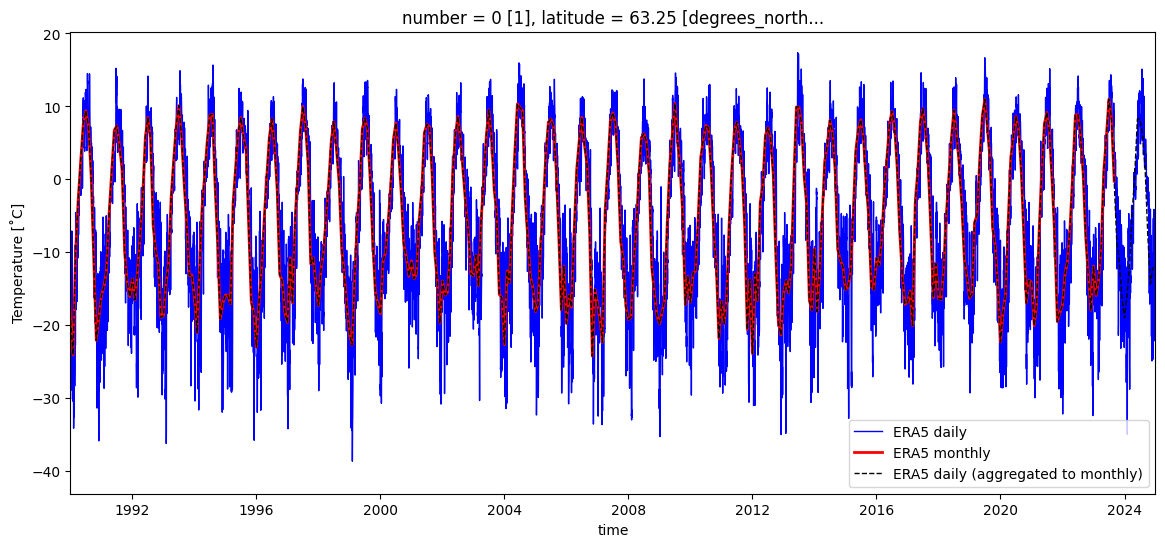

In [4]:
# --- Plot temperature ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 2024.5, 1)

# load data
monthly_t2m_ds = xr.open_dataset(monthly_t2m_fp).load()
monthly_t2m_pixel = monthly_t2m_ds['t2m'].sel(latitude=63.3, longitude=360-145.4, method='nearest') - 273.15

# combine two expver slices into one continuous series
monthly_t2m_pixel = monthly_t2m_pixel.fillna(monthly_t2m_pixel.sel(expver=5))
monthly_t2m_pixel = monthly_t2m_pixel.sel(expver=1)  # drop the extra dimension

daily_t2m_ds = xr.open_dataset(daily_t2m_fp).load()
daily_t2m_pixel = daily_t2m_ds['t2m'].sel(latitude=63.3, longitude=-145.4, method='nearest') - 273.15
daily_t2m_pixel_ms = daily_t2m_pixel.resample(time='1MS').mean()
    
# add time series
daily_t2m_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_t2m_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_t2m_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

ax1.patch.set_visible(False)
ax1.set_ylabel('Temperature [˚C]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()


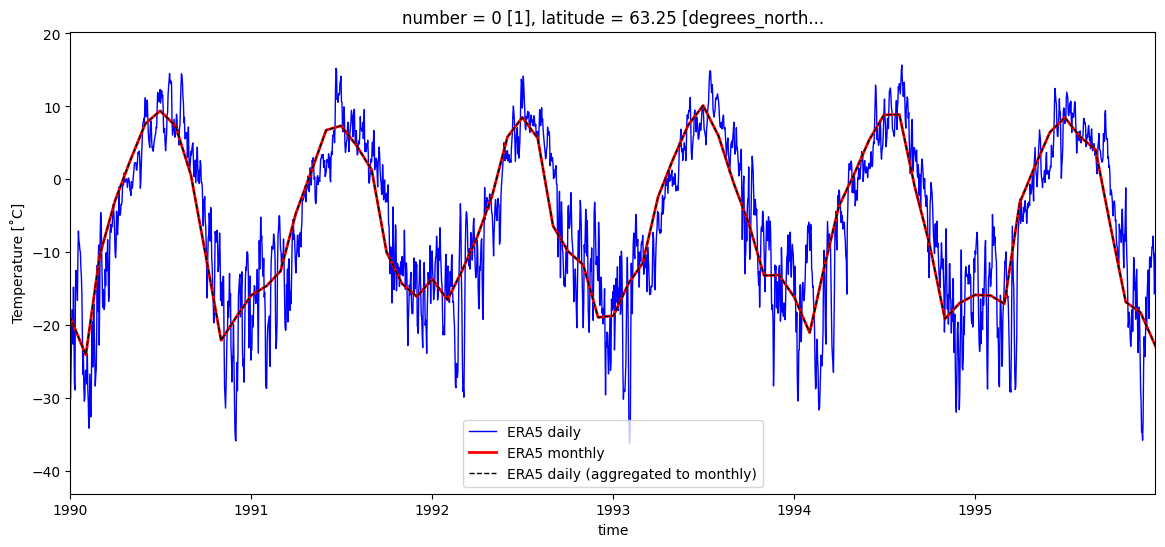

In [5]:
# --- Plot temperature ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 1995.5, 1)

# load data
monthly_t2m_ds = xr.open_dataset(monthly_t2m_fp).load()
monthly_t2m_pixel = monthly_t2m_ds['t2m'].sel(latitude=63.3, longitude=360-145.4, method='nearest') - 273.15

# combine two expver slices into one continuous series
monthly_t2m_pixel = monthly_t2m_pixel.fillna(monthly_t2m_pixel.sel(expver=5))
monthly_t2m_pixel = monthly_t2m_pixel.sel(expver=1)  # drop the extra dimension

daily_t2m_ds = xr.open_dataset(daily_t2m_fp).load()
daily_t2m_pixel = daily_t2m_ds['t2m'].sel(latitude=63.3, longitude=-145.4, method='nearest') - 273.15
daily_t2m_pixel_ms = daily_t2m_pixel.resample(time='1MS').mean()
    
# add time series
daily_t2m_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_t2m_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_t2m_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

ax1.patch.set_visible(False)
ax1.set_ylabel('Temperature [˚C]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()


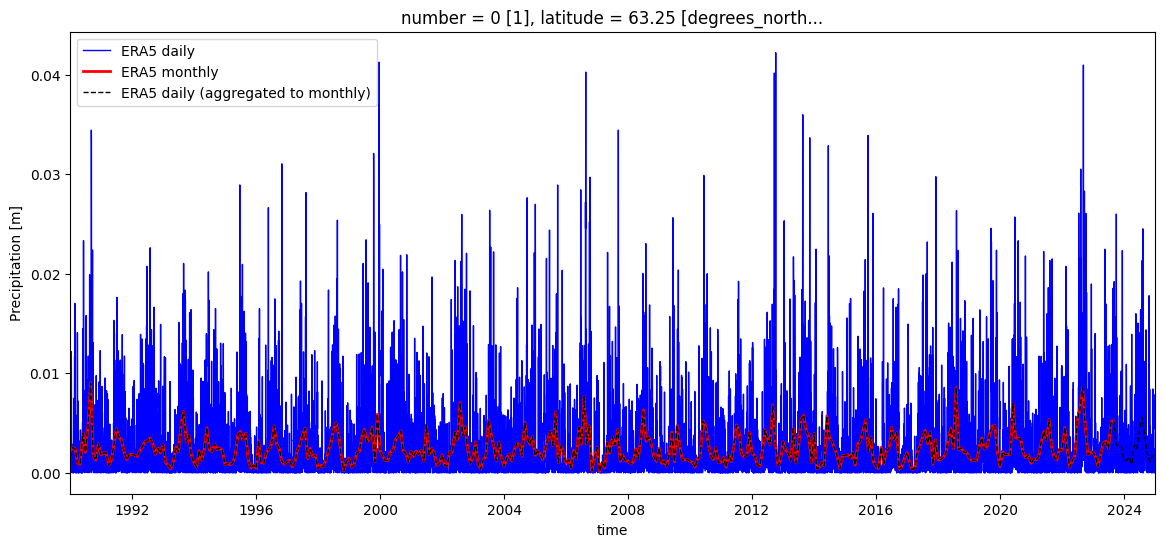

In [6]:
# --- Plot precipitation ---
fig, ax1 = plt.subplots(figsize=(14,6))
years = np.arange(1990, 2024.5, 1)

# load data
monthly_tp_ds = xr.open_dataset(monthly_tp_fp).load()
monthly_tp_pixel = monthly_tp_ds['tp'].sel(latitude=63.3, longitude=360-145.4, method='nearest')

# combine two expver slices into one continuous series
monthly_tp_pixel = monthly_tp_pixel.fillna(monthly_tp_pixel.sel(expver=5))
monthly_tp_pixel = monthly_tp_pixel.sel(expver=1)  # drop the extra dimension

daily_tp_ds = xr.open_dataset(daily_tp_fp).load()
daily_tp_pixel = daily_tp_ds['tp'].sel(latitude=63.3, longitude=-145.4, method='nearest')
days_in_month = daily_tp_pixel['time'].dt.days_in_month
daily_tp_pixel_ms = daily_tp_pixel.resample(time='1MS').sum()/ days_in_month # convert monthly values to [m/day]

# add time series
daily_tp_pixel.plot(ax=ax1, linewidth=1, color='b', label='ERA5 daily')
monthly_tp_pixel.plot(ax=ax1, linewidth=2, color='r', label='ERA5 monthly')
daily_tp_pixel_ms.plot(ax=ax1, linewidth=1, ls='--', color='k', label='ERA5 daily (aggregated to monthly)')

# ax1.set_ylim(0,)
ax1.patch.set_visible(False)
ax1.set_ylabel('Precipitation [m]')
ax1.set_xlim(pd.to_datetime(f'{int(years[0])}-01-01'), pd.to_datetime(f'{int(years[-1])}-12-31'))
ax1.legend()
plt.show()


Great! The daily and monthly climate data both make sense, and are identical when the daily data is aggregated to monthly.

## Simple calibration and simulation -- monthly

Perform a simple model calibration and simulation using monthly climate data. See the *[simple_test.ipynb](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/simple_test.ipynb)* notebook for more details on each function.

In [7]:
# update the include_frontalablation key as described above
config_manager.update_config(updates={'time.timestep': 'monthly',
                                      'climate.paths.era5_relpath': '/climate_data/ERA5/',
                                      'climate.paths.era5_temp_fn': 'ERA5_temp_monthly.nc',
                                      'climate.paths.era5_prec_fn': 'ERA5_totalprecip_monthly.nc',
                                      'climate.paths.era5_elev_fn': 'ERA5_geopotential.nc',
                                      'climate.paths.era5_lr_fn': 'ERA5_lapserates_monthly.nc',
                                      'sim.out.export_extra_vars': True})


In [8]:
# run the calibration for Gulkana Glacier
reg = 1
glac_no = 01.00570
reg_str = str(reg).zfill(2)
glacier_str = "{:.5f}".format(glac_no) # preserve trailing 0
!run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration HH2015

Processing: ERA5
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
ERA5 : RGI60-01.00570
2025-10-30 11:06:27: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-30 11:06:27: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-30 11:06:27: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-30 11:06:27: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-10-30 11:06:27: oggm.cfg: PARAMS['dl_verify'] changed from `False` to `True`.
2025-10-30 11:06:27: oggm.cfg: PARAMS['use_multiple_flowlines'] changed from `True` to `False`.
2025-10-30 11:06:27: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-10-30 11:06:27: oggm.workflow: Execute entity tasks [debris_to_gdir] on 1 glaciers
2025-10-30 11:06:27: oggm.workflow: Execute entity tasks [debris_binned] on 1 glaciers
2025-10-30 11:06:27: oggm.

In [9]:
# run a present-day simulation
gcm_name = 'ERA5'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_startyear 2000 -sim_endyear 2019 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False

2025-10-30 11:06:29: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-30 11:06:29: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-30 11:06:29: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-30 11:06:29: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-30 11:06:29: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-30 11:06:29: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: ERA5
Processing with 1 cores...
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
ERA5 : RGI60-01.00570
2025-10-30 11:06:29: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-30 11:06:29: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-30 11:06:29: oggm.cfg: Multiprocessing: using all available processors (N=10)
2

In [10]:
# load simulation output
ds_monthly = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg_str}/{gcm_name}/stats/{glacier_str}_{gcm_name}_HH2015*_2000_2019_all.nc*')[0])

# delete file (the daily simulation output saves with the same filename)
os.remove(glob.glob(f'{rootpath}/Output/simulations/{reg_str}/{gcm_name}/stats/{glacier_str}_{gcm_name}_HH2015*_2000_2019_all.nc*')[0])


## Simple calibration and simulation -- daily

Repeat the above steps with daily climate data

In [11]:
# update the include_frontalablation key as described above
config_manager.update_config(updates={'time.timestep': 'daily',
                                      'climate.paths.era5_relpath': None,
                                      'climate.paths.era5_temp_fn': f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_temp_daily.nc",
                                      'climate.paths.era5_prec_fn': f"{pygem_prms['root']}/climate_data/ERA5_daily/ERA5_totalprecip_daily.nc",
                                      'climate.paths.era5_elev_fn': f"{pygem_prms['root']}/climate_data/ERA5/ERA5_geopotential.nc",
                                      'climate.paths.era5_lr_fn': f"{pygem_prms['root']}/climate_data/ERA5/ERA5_lapserates_monthly.nc",
                                      'sim.out.export_extra_vars': True})


In [12]:
# run the calibration for Gulkana Glacier
!run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration HH2015

Processing: ERA5
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
/Users/albinwells/Desktop/PyGEM-main/PyGEM/pygem/class_climate.py:441: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  daily_data = xr.DataArray(
ERA5 : RGI60-01.00570
2025-10-30 11:06:32: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-30 11:06:32: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-30 11:06:32: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10

In [13]:
# run a present-day simulation
gcm_name = 'ERA5'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_startyear 2000 -sim_endyear 2019 -option_calibration HH2015 -option_dynamics OGGM -use_regional_glen_a False

2025-10-30 11:06:39: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-30 11:06:39: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-30 11:06:39: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-30 11:06:39: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-30 11:06:39: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-30 11:06:39: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
Processing: ERA5
Processing with 1 cores...
1 glaciers in region 1 are included in this model run: ['00570']
This study is focusing on 1 glaciers in region [1]
/Users/albinwells/Desktop/PyGEM-main/PyGEM/pygem/class_climate.py:441: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision val

In [14]:
# load simulation output
ds_daily = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg_str}/{gcm_name}/stats/{glacier_str}_{gcm_name}_HH2015*_2000_2019_all.nc*')[0])


Compare positive degree-days from the model output

In [15]:
monthly_series = pd.Series(ds_monthly['glac_temp'][0].values - 273.15, index=pd.to_datetime(ds_monthly.time))
daily_series = pd.Series(ds_daily['glac_temp'][0].values - 273.15, index=pd.to_datetime(ds_daily.time))

# function to calculate annual positive degree-days
def annual_pdd(ts):
    ts_pos = ts.copy()
    ts_pos[ts_pos < 0] = 0  # only positive temperatures
    if (ts_pos.index[1] - ts_pos.index[0]).days > 1: # if data is not daily
        ts_pos = ts_pos * ts_pos.index.days_in_month
        
    return ts_pos.groupby(ts_pos.index.year).sum()

# calculate annual PDDs
pdd_monthly = annual_pdd(monthly_series)
pdd_daily = annual_pdd(daily_series)

pdd_df = pd.DataFrame({'PDD_daily': pdd_daily, 'PDD_monthly': pdd_monthly})
pdd_df

,PDD_daily,PDD_monthly
2000,289.698925,272.663468
2001,404.856282,398.843882
2002,415.290334,368.678593
2003,451.712231,412.008160
2004,690.811677,675.470601
2005,513.399579,470.321165
2006,386.165383,326.656644
2007,549.167238,503.845088
2008,295.433444,279.072890
2009,511.149634,435.527806


## Plot

Visualize and compare the model outputs.

In [16]:
# --- get monthly data simulation output ---
# pull monthly runoff and resample to annual values
ds_monthly_sum = ds_monthly['glac_runoff'][0].resample(time='YE').sum('time') # monthly runoff
annual_runoff_monthly = ds_monthly_sum.values # append annual runoff to list
annual_area_monthly = ds_monthly['glac_area_annual'][0].values[1:] # pull annual area
annual_mass_monthly = ds_monthly['glac_mass_annual'][0].values[1:] # pull annual mass
annual_abl_monthly = ds_monthly['glac_melt'][0].resample(time='YE').sum('time').values # monthly melt
annual_acc_monthly = ds_monthly['glac_acc'][0].resample(time='YE').sum('time').values # monthly accumulation
annual_cmb_monthly = ds_monthly['glac_massbaltotal'][0].resample(time='YE').sum('time').values/annual_area_monthly # monthly mass balance
year_monthly = (ds_monthly.year.values[:-1:]) # pull years

# --- get daily data simulation output ---
# pull monthly runoff and resample to annual values
ds_daily_sum = ds_daily['glac_runoff'][0].resample(time='YE').sum('time') # monthly runoff
annual_runoff_daily = ds_daily_sum.values # append annual runoff to list
annual_area_daily = ds_daily['glac_area_annual'][0].values[1:] # pull annual area
annual_mass_daily = ds_daily['glac_mass_annual'][0].values[1:] # pull annual mass
annual_abl_daily = ds_daily['glac_melt'][0].resample(time='YE').sum('time').values # monthly melt
annual_acc_daily = ds_daily['glac_acc'][0].resample(time='YE').sum('time').values # monthly accumulation
annual_cmb_daily = ds_daily['glac_massbaltotal'][0].resample(time='YE').sum('time').values/annual_area_daily # monthly mass balance

year_daily = (ds_daily.year.values[:-1:]) # pull years


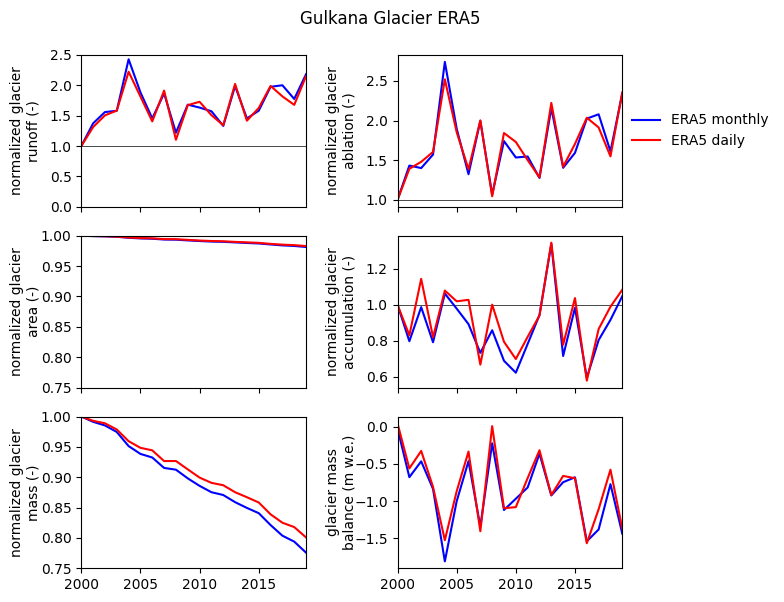

In [17]:
# create 3 x 1 plot with runoff, area, mass
fig,ax = plt.subplots(3,2,figsize=(8,6),sharex=True, sharey=False)
ax = ax.flatten()

ax[0].plot(year_monthly, annual_runoff_monthly/annual_runoff_monthly[0], c='b')
ax[0].plot(year_daily, annual_runoff_daily/annual_runoff_daily[0], c='r')
ax[2].plot(year_monthly, annual_area_monthly/annual_area_monthly[0], c='b')
ax[2].plot(year_daily, annual_area_daily/annual_area_daily[0], c='r')
ax[4].plot(year_monthly, annual_mass_monthly/annual_mass_monthly[0], c='b')
ax[4].plot(year_daily, annual_mass_daily/annual_mass_daily[0], c='r')

# plot right column
ax[1].plot(year_monthly, annual_abl_monthly/annual_abl_monthly[0], c='b')
ax[1].plot(year_daily, annual_abl_daily/annual_abl_daily[0], c='r')
ax[3].plot(year_monthly, annual_acc_monthly/annual_acc_monthly[0], c='b')
ax[3].plot(year_daily, annual_acc_daily/annual_acc_daily[0], c='r')
ax[5].plot(year_monthly, annual_cmb_monthly, c='b')
ax[5].plot(year_daily, annual_cmb_daily, c='r')

# add xlines
ax[0].axhline(1, c='k', ls='-', lw=0.5, zorder=0)
ax[1].axhline(1, c='k', ls='-', lw=0.5, zorder=0)
ax[3].axhline(1, c='k', ls='-', lw=0.5, zorder=0)

# create legend
ax[1].plot([],[], c='b', label='ERA5 monthly')
ax[1].plot([],[], c='r', label='ERA5 daily')
ax[1].legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False, borderaxespad=0)

# set x axis limits to temporal extent of our data
ax[0].set_ylim([0,2.5])
ax[2].set_ylim([0.75,1])
ax[4].set_ylim([0.75,1])
ax[0].set_xlim([2000,2019])

# add labels
ax[0].text(-0.25, 0.5, 'normalized glacier\nrunoff (-)', va='center', ha='center', rotation=90, transform=ax[0].transAxes)
ax[2].text(-0.25, 0.5, 'normalized glacier\narea (-)', va='center', ha='center', rotation=90, transform=ax[2].transAxes)
ax[4].text(-0.25, 0.5, 'normalized glacier\nmass (-)', va='center', ha='center', rotation=90, transform=ax[4].transAxes)
ax[1].text(-0.25, 0.5, 'normalized glacier\nablation (-)', va='center', ha='center', rotation=90, transform=ax[1].transAxes)
ax[3].text(-0.25, 0.5, 'normalized glacier\naccumulation (-)', va='center', ha='center', rotation=90, transform=ax[3].transAxes)
ax[5].text(-0.25, 0.5, 'glacier mass\nbalance (m w.e.)', va='center', ha='center', rotation=90, transform=ax[5].transAxes)
fig.suptitle('Gulkana Glacier ERA5', va='center', ha='center', rotation=0,)
fig.subplots_adjust(right=0.8)
fig.tight_layout()
